# Decision Trees

- Decision Tree Algorithm
- How does the Decision Tree algorithm work?
- Attribute Selection Measures
- Information Gain
- Gain Ratio
- Gini index
- Optimizing Decision Tree Performance
- Classifier Building in Scikit-learn
- Pros and Cons
- Conclusion

Decision Tree Algorithm
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.


Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

How does the Decision Tree algorithm work?
The basic idea behind any decision tree algorithm is as follows:

Select the best attribute using Attribute Selection Measures(ASM) to split the records.
Make that attribute a decision node and breaks the dataset into smaller subsets.
Starts tree building by repeating this process recursively for each child until one of the condition will match:
All the tuples belong to the same attribute value.
There are no more remaining attributes.
There are no more instances.

Attribute Selection Measures
Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute (Source). In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

Information Gain
Shannon invented the concept of entropy, which measures the impurity of the input set. In physics and mathematics, entropy referred as the randomness or the impurity in the system. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. ID3 (Iterative Dichotomiser) decision tree algorithm uses information gain.


Gain Ratio
Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier such as customer_ID has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

C4.5, an improvement of ID3, uses an extension to information gain known as the gain ratio. Gain ratio handles the issue of bias by normalizing the information gain using Split Info. Java implementation of the C4.5 algorithm is known as J48, which is available in WEKA data mining tool.

The attribute with the highest gain ratio is chosen as the splitting attribute (Source).

Gini index
Another decision tree algorithm CART (Classification and Regression Tree) uses the Gini method to create split points.

Where, pi is the probability that a tuple in D belongs to class Ci.

The Gini Index considers a binary split for each attribute. You can compute a weighted sum of the impurity of each partition. If a binary split on attribute A partitions data D into D1 and D2, the Gini index of D is:

In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point.

The attribute with minimum Gini index is chosen as the splitting attribute.

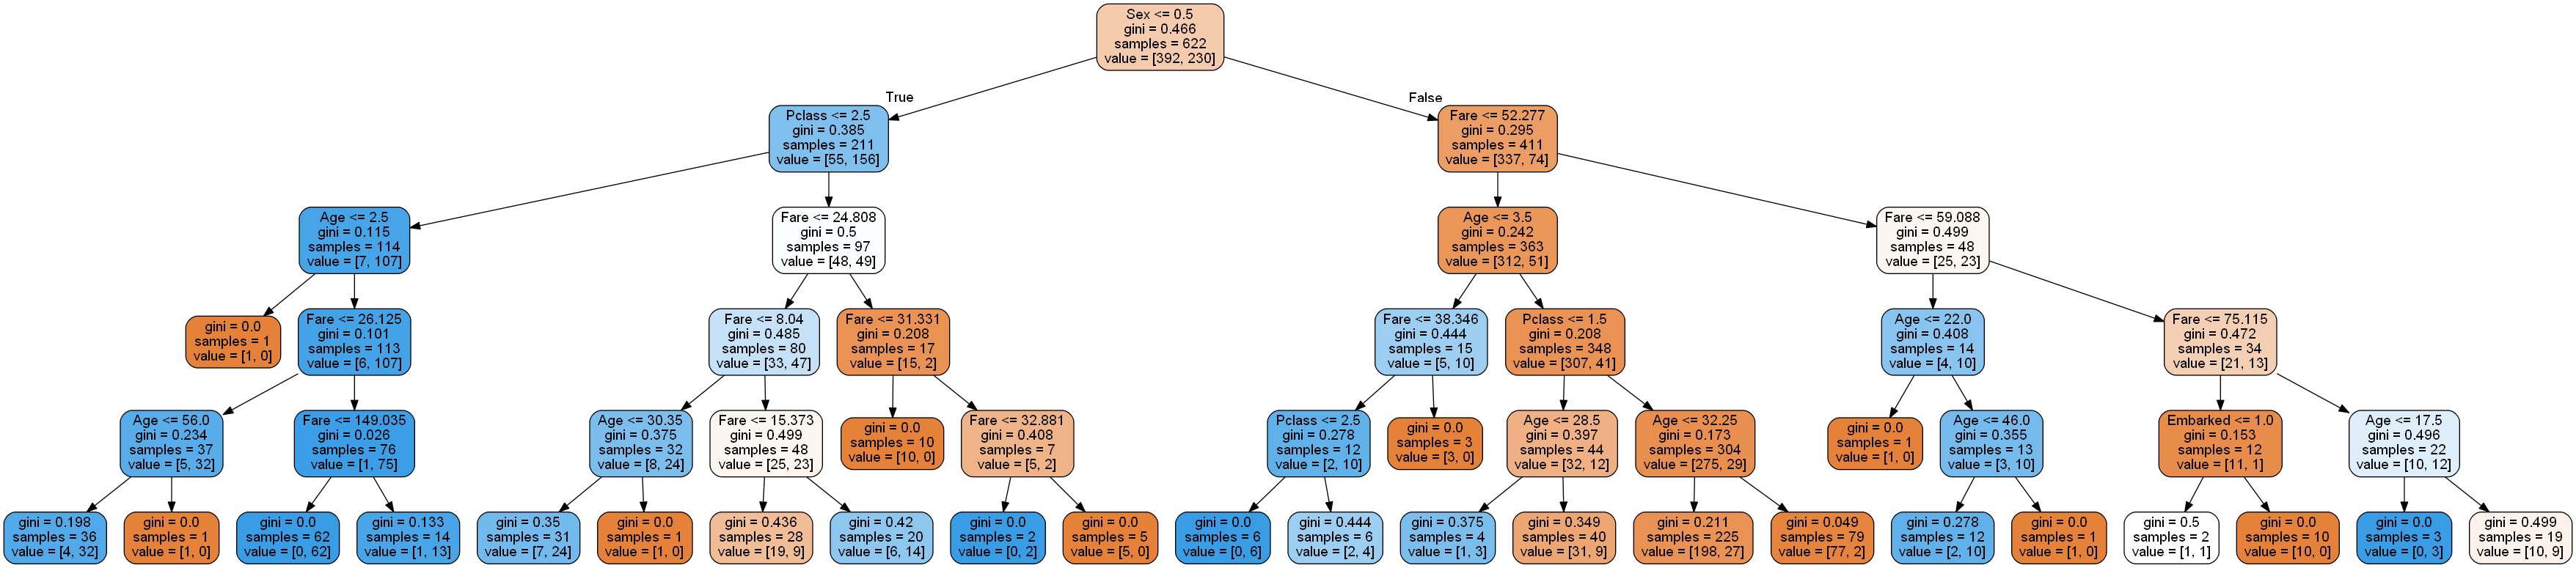

In [54]:
from IPython.display import Image
Image(filename='tree1.png')

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('titanic_train.csv', index_col='PassengerId')

In [8]:
pd.DataFrame(df.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will be using Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived

In [10]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [11]:
df.head() # now we are using these columns and predict whether survive or not

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,0
2,1,female,38.0,1,0,71.2833,1
3,3,female,26.0,0,0,7.9250,1
4,1,female,35.0,1,0,53.1000,1
5,3,male,35.0,0,0,8.0500,0


In [12]:
#We need to convert ‘Sex’ into an integer value of 0 or 1.
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [13]:
df.Sex.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Sex, dtype: int64

In [22]:
df.isnull().any() # here age have null values

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Survived    False
dtype: bool

In [23]:
#We will also drop any rows with missing values.
df = df.dropna()

In [24]:
df.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Survived    False
dtype: bool

## Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [25]:
X = df.drop('Survived', axis=1)# here we remove survive column into dataframe
y = df['Survived']

In [26]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,0,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,3,1,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,3,1,39.0,0,5,29.1250
887,2,0,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000


In [27]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 714, dtype: int64

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

## Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier()

clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [33]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [34]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1])

## Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [35]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test, y_pred)

0.8268156424581006

In [38]:
from sklearn.metrics import confusion_matrix

In [40]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival'])

,Predicted Not Survival,Predicted Survival
True Not Survival,97,15
True Survival,16,51


In [55]:
 confusion_matrix(y_test, y_pred)

array([[97, 15],
       [16, 51]])

In [56]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7727272727272727

In [57]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7611940298507462